In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from scipy.optimize import curve_fit
import math as math

In [2]:
P1 = np.array([1084.5, 1108.5, 1132.7, 1156.8, 1180.9, 1089.32, 1118.24, 1147.16, 1166.44])
P2 = np.array([0.02, 0.21, 0.43, 0.52, 0.81, 0.13, 0.33, 0.47, 0.6])

In [3]:
def linear_func(x, a, b):
    return a * x + b

In [4]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

In [5]:
params, covariance= curve_fit(linear_func, P1, P2)
x_new = P1
y_new = linear_func(x_new, params[0], params[1])

In [6]:
x_err = np.array([11.89, 11.94, 11.99, 12.04, 12.09, 11.9, 11.96, 12.02, 12.06])

C:\Users\Саша\AppData\Local\Temp\ipykernel_17176\4185961869.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(P1, P2, color = 'green', xerr = x_err, linestyle='None', label = 'Данные эксперимента', capsize=3, fmt="ob",  ecolor="k")


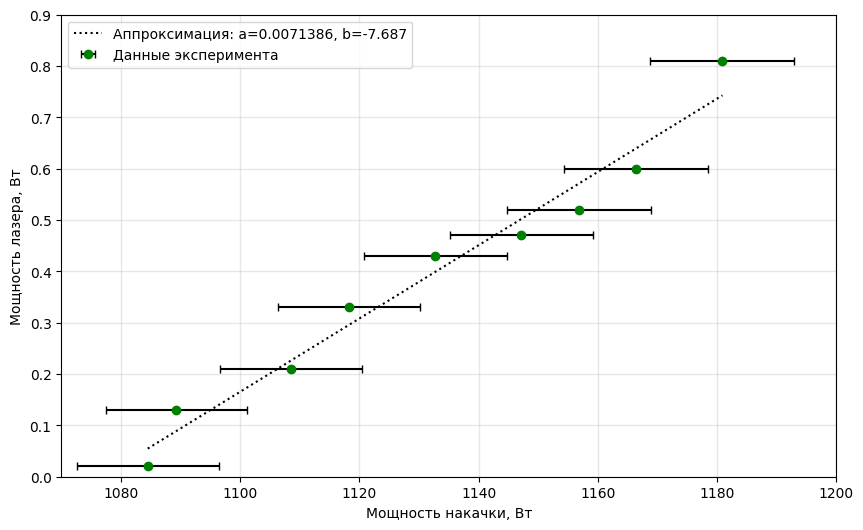

In [7]:
plt.figure(figsize = (10, 6))
#plt.scatter(P1, P2, s = 12, label = 'Данные эксперимента')
plt.errorbar(P1, P2, color = 'green', xerr = x_err, linestyle='None', label = 'Данные эксперимента', capsize=3, fmt="ob",  ecolor="k") 
plt.plot(sorted(x_new), sorted(y_new), linestyle = 'dotted', color = 'black', linewidth = 1.5, label = 'Аппроксимация: a=%5.7f, b=%5.3f' % tuple(params))
plt.xlabel('Мощность накачки, Вт')
plt.ylabel('Мощность лазера, Вт')
plt.xlim([1070, 1200])
plt.ylim([0, 0.9])
plt.legend()
plt.grid(linewidth = 1, alpha = 0.3)
plt.savefig("tresh.png")
plt.show()

In [8]:
#third plot 
#corner = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 0, -5, -10, -15, -20, -25, -30, -35, -40])
#p_second_garm = np.array([0.0015, 0.0018, 0.0017, 0.0014, 0.0011, 0.0008, 0.0005, 0.0001, 0.0000, 0.0013, 0.001, 0.0006, 0.0003, 0.0008, 0.0007,  0.0005, 0.0001, 0])

corner = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, -20, -25, -30, -40, -45])
p_second_garm = np.array([0.0015, 0.0018, 0.0017, 0.0014, 0.0011, 0.0008, 0.0005, 0.0001, 0.0000, 0.0003, 0.0008, 0.0007, 0.0005, 0.0001, 0])
#print(len(corner))
#p_second_garm(corner)
#temp_y = [np.sinc(p)**2 for p in corner]
#params_3, covariance_3 = curve_fit(linear_func, temp_y, corner)
#temp_x = [x / 100 for x in range(100)]
#temp_y_new= [params_2[0]*np.sinc(p)**2 + params_2[1] for p in temp_x]

In [9]:
def f(x,a,b,c):
    return a * np.sin(b * x + c)**2 / (b * x + c)**2 
#third plot 
x_exp = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 0, -5, -10, -15, -40])
y_exp = np.array([0.0015, 0.0018, 0.0017, 0.0014, 0.0011, 0.0008, 0.0005, 0.0001, 0.0000, 0.0013, 0.001, 0.0006, 0.0003, 0])

In [10]:
x_app = np.linspace(min(x_exp), max(x_exp), 100)
params_tmp = [0] * 3
params_tmp[0] = a = max(y_exp)
print(a)
params_tmp[1] = b = 2 * np.pi / 65
params_tmp[2] = c = - x_exp[1] * b;
y_app = f(x_app, a, b, c)

0.0018


In [11]:
p_lazer_err_2 = np.full(len(y_exp), 0.0001)
coner_err  = np.full(len(x_exp) , 1)

C:\Users\Саша\AppData\Local\Temp\ipykernel_17176\2419098222.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x_exp, y_exp, color = 'green', yerr = p_lazer_err_2, xerr = coner_err, linestyle='None', label = 'Данные эксперимента', capsize=3, fmt="ob",  ecolor="k")


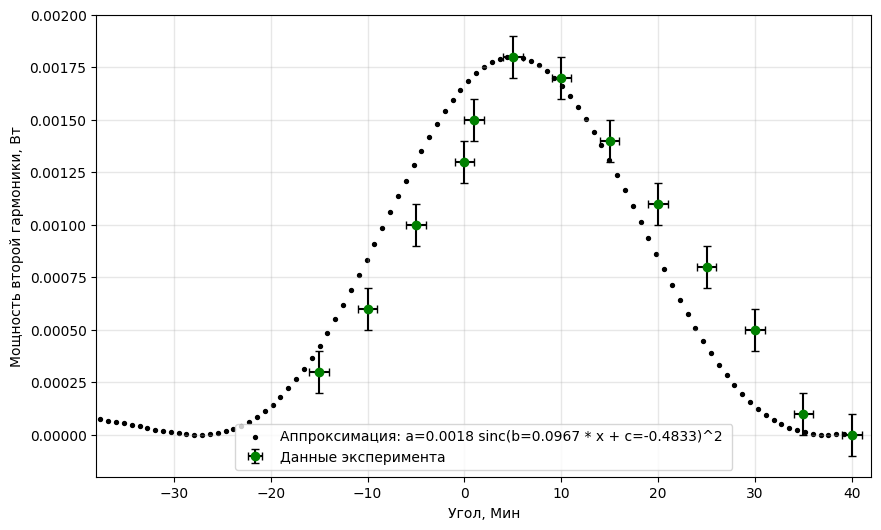

In [12]:
plt.figure(figsize = (10, 6))
plt.errorbar(x_exp, y_exp, color = 'green', yerr = p_lazer_err_2, xerr = coner_err, linestyle='None', label = 'Данные эксперимента', capsize=3, fmt="ob",  ecolor="k") 
plt.scatter(x_app, y_app,  s = 8, color = 'black', label = 'Аппроксимация: a=%5.4f sinc(b=%5.4f * x + c=%5.4f)^2 ' % tuple(params_tmp))
#pl.scatter(x_exp, y_exp, s = 9, label = 'Измерения')
plt.xlabel('Угол, Мин')
plt.ylabel('Мощность второй гармоники, Вт')
plt.xlim([-38, 42])
plt.grid(linewidth = 1, alpha = 0.3)
plt.legend()
plt.savefig("tresh_4.png")
plt.show()

In [13]:
p_lazer = np.array([0.07, 0.12, 0.4, 0.49, 0.7, 0.92, 0.96])
p_garm  = np.array([0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.6])

#p_garm(p_lazer)
temp_p_lazer = [p*p for p in p_lazer]
params_2, covariance_2 = curve_fit(linear_func, temp_p_lazer, p_garm)

temp_x = [x / 100 for x in range(100)]
temp_y_lazer = [params_2[0]*p**2 + params_2[1] for p in temp_x]

In [14]:
p_lazer_err = np.full(len(p_lazer), 0.01)
p_garm_err  = np.full(len(p_garm) , 0.05)

C:\Users\Саша\AppData\Local\Temp\ipykernel_17176\1303312341.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(p_lazer, p_garm, color = 'green', yerr = p_garm_err, xerr = p_lazer_err, linestyle='None', label = 'Данные эксперимента', capsize=3, fmt="ob",  ecolor="k")


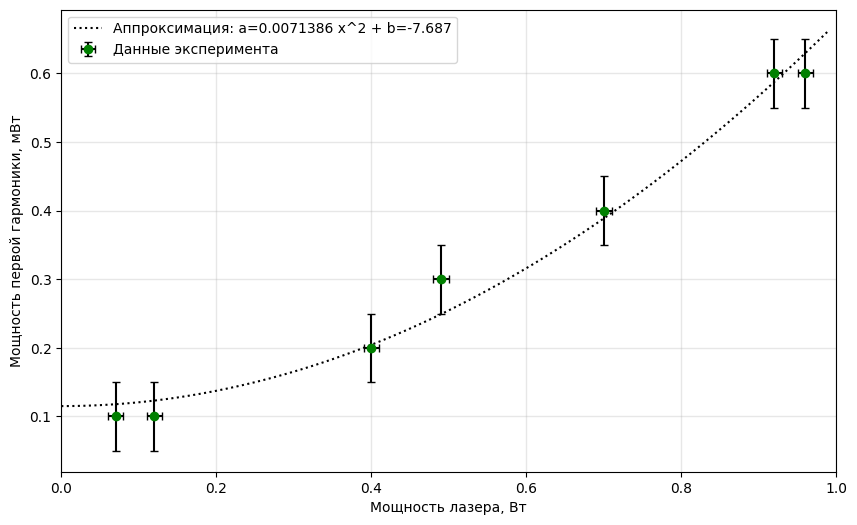

In [15]:
plt.figure(figsize = (10, 6))
#plt.scatter(p_lazer, p_garm, s = 12, label = 'Данные эксперимента')
plt.errorbar(p_lazer, p_garm, color = 'green', yerr = p_garm_err, xerr = p_lazer_err, linestyle='None', label = 'Данные эксперимента', capsize=3, fmt="ob",  ecolor="k") 
plt.plot(sorted(temp_x), sorted(temp_y_lazer), linestyle = 'dotted', color = 'black', linewidth = 1.5, label = 'Аппроксимация: a=%5.7f x^2 + b=%5.3f' % tuple(params))
plt.xlabel('Мощность лазера, Вт')
plt.ylabel('Мощность первой гармоники, мВт')
plt.xlim([0.0, 1])
#plt.ylim([0.0, 0.7])
plt.legend()
plt.grid(linewidth = 1, alpha = 0.3)
plt.savefig("tresh_2.png")
plt.show()